<a href="https://colab.research.google.com/github/ambarishreddy/ibm-applied-datascience/blob/main/Assignment-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('/content/penguins_size (1).csv')

In [43]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


UNIVARIATE ANALYSIS

(array([21., 35., 32., 34., 44., 55., 56., 39., 16., 10.]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]),
 <BarContainer object of 10 artists>)

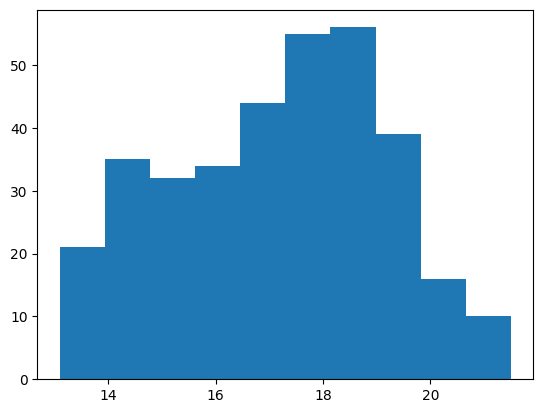

In [44]:
plt.hist(df['culmen_depth_mm']) 

<Axes: >

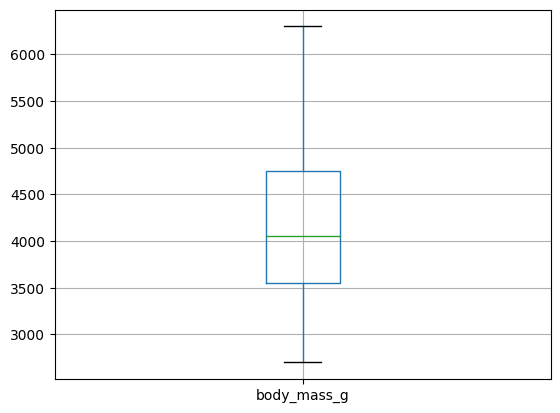

In [45]:
df.boxplot(column="body_mass_g")

BIVARIATE ANALYSIS

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

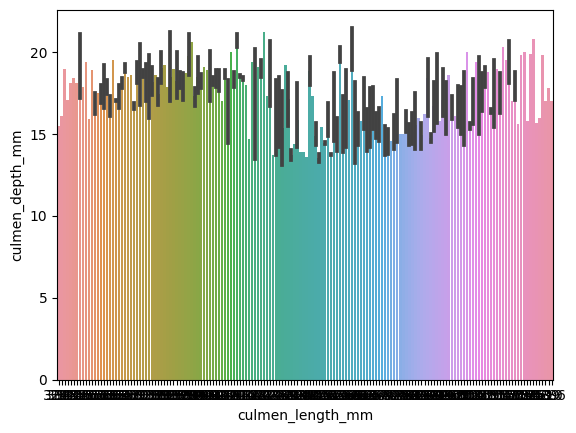

In [46]:
sns.barplot(x="culmen_length_mm",y="culmen_depth_mm",data=df)

<Axes: xlabel='species', ylabel='count'>

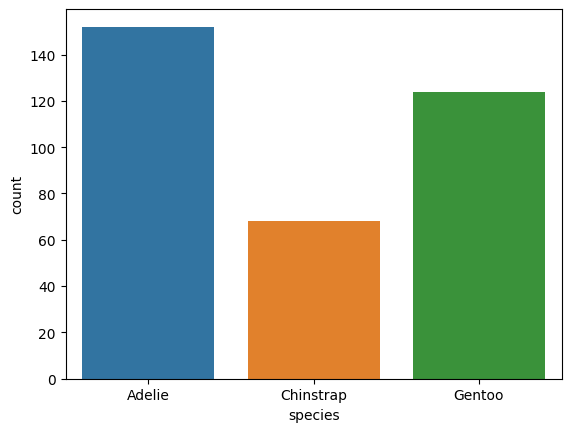

In [47]:
sns.countplot(x="species",data=df)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

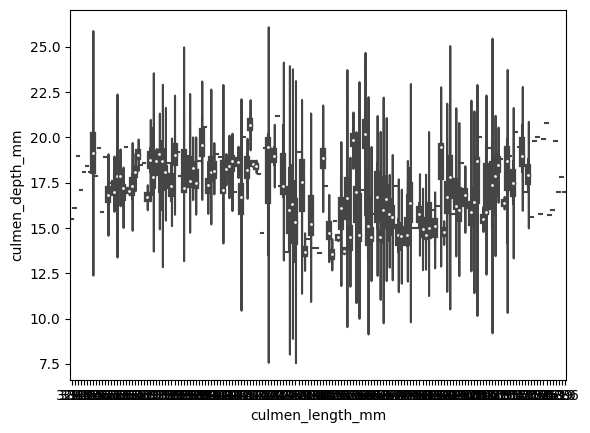

In [48]:
sns.violinplot(x="culmen_length_mm",y="culmen_depth_mm",data=df)

MULTIVARIATE ANALYSIS

<ipython-input-49-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

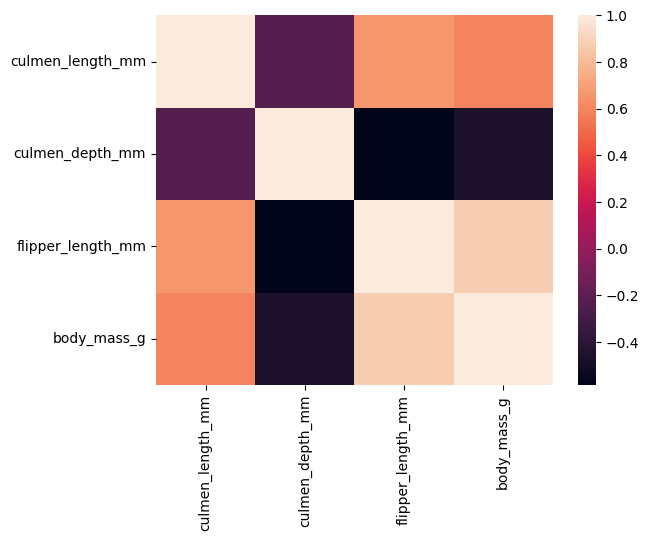

In [49]:
sns.heatmap(df.corr())

DESCRIPTIVE STATISTICS

In [50]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


NULL HANDLING

In [51]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [52]:
df.dropna(inplace=True)
df.dropna(axis=1,inplace=True)

OUTLIERS

In [53]:
import numpy as np
# generate some random data
data = np.random.normal(loc=50, scale=10, size=100)
# define a function to detect and replace outliers using IQR method
def replace_outliers_IQR(data):
    # calculate the quartiles and IQR
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1

    # detect outliers using IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]

    # replace outliers with the median value
    data[outliers] = np.median(data)

    return data

# call the function and print the results
print("Original data:", data)
data_replaced = replace_outliers_IQR(data)
print("Data with replaced outliers:", data_replaced)

Original data: [29.65430803 49.50083867 71.08452937 47.59292553 46.84602527 59.41171283
 50.15511593 40.9901801  51.01742328 56.62522408 40.50697246 60.68706942
 46.04679837 66.07474377 54.14556422 54.54387383 57.16739348 66.80350115
 45.00542462 33.75638048 38.06697122 40.79350251 59.51664139 57.30327455
 67.86735628 53.61973577 58.84714806 58.27027969 37.82556389 49.26173297
 53.13946903 48.59834066 70.18972688 38.44776505 61.31990277 43.18299389
 55.29581051 28.17146042 37.72160234 50.87274743 57.92251784 46.69480177
 40.69248109 62.78812861 30.20543873 52.00953106 41.21049059 51.30783554
 59.48795455 28.47647331 38.52493737 54.32311018 41.60182635 56.78879703
 40.66067277 56.35140664 53.17725029 53.75362048 54.75504791 54.88790993
 54.73140299 53.51337757 53.83800356 37.67830545 40.27745135 54.28931118
 49.56233893 26.59587214 43.65807794 50.94102596 51.71755916 55.65778695
 54.45606083 45.75705217 54.80619793 54.78902956 37.94259018 57.23812427
 31.62031866 59.33547809 44.83456622

In [54]:
#df = df.drop(columns=(["culmen_length_mm"]))

In [55]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


CATEGORIAL COLUMNS AND PERFORM ENCODING

In [56]:
df_categorical =df[['flipper_length_mm','culmen_depth_mm','body_mass_g','culmen_length_mm']]

In [57]:
df_categorical.head()

,flipper_length_mm,culmen_depth_mm,body_mass_g,culmen_length_mm
0,181.0,18.7,3750.0,39.1
1,186.0,17.4,3800.0,39.5
2,195.0,18.0,3250.0,40.3
4,193.0,19.3,3450.0,36.7
5,190.0,20.6,3650.0,39.3


In [58]:
print(df['culmen_depth_mm'].unique())

[18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 21.1 19.  20.7 18.4 21.5
 18.3 19.2 18.1 17.2 18.9 18.6 17.9 16.7 17.  20.  18.5 19.1 19.7 16.9
 18.8 17.7 19.5 17.5 16.6 18.2 17.1 16.2 19.4 16.8 16.1 20.3 17.3 16.
 16.5 20.5 19.8 15.9 20.1 15.5 19.9 20.8 16.4 13.2 16.3 14.1 15.2 14.5
 13.5 14.6 15.3 13.4 15.4 13.7 15.7 15.1 14.3 15.8 13.1 15.  14.2 14.8
 13.6 13.9 13.3 14.4 13.8 14.9 15.6 14.  14.7]


In [59]:
print(df['flipper_length_mm'].unique())

[181. 186. 195. 193. 190. 182. 191. 198. 185. 197. 184. 194. 174. 180.
 189. 187. 183. 172. 178. 188. 196. 200. 192. 202. 205. 208. 203. 199.
 176. 210. 201. 212. 206. 207. 211. 230. 218. 215. 219. 209. 214. 216.
 213. 217. 221. 222. 220. 225. 224. 231. 229. 223. 228. 226.]


In [60]:
print(df['body_mass_g'].unique())

[3750. 3800. 3250. 3450. 3650. 3625. 4675. 3200. 4400. 3700. 4500. 3325.
 4200. 3400. 3600. 3950. 3550. 3150. 3900. 3300. 4150. 4650. 3100. 3000.
 4600. 3425. 3500. 4300. 4050. 2900. 2850. 3350. 4100. 3050. 4450. 4250.
 4000. 4700. 4350. 3725. 4725. 3075. 2925. 3175. 4775. 3825. 4275. 4075.
 3775. 3875. 3275. 4475. 3975. 3475. 3525. 3575. 4550. 3850. 4800. 2700.
 3675. 5700. 5400. 5200. 5150. 5550. 5850. 6300. 5350. 5000. 5050. 5100.
 5650. 5250. 6050. 4950. 4750. 4900. 5300. 4850. 5800. 6000. 5950. 4625.
 5450. 5600. 4875. 4925. 4975. 5500. 4575. 4375. 5750.]


In [61]:
# perform one-hot encoding
encoded_df = pd.get_dummies(df)

# print the encoded dataframe
print(encoded_df)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0

In [62]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


ENCODE THE CATEGORICAL VARIABLES

In [63]:
from sklearn.preprocessing import LabelEncoder
el=LabelEncoder()
el2=LabelEncoder()

In [64]:
df['island']=el.fit_transform(df['island'])
df['species']=el.fit_transform(df['species'])
#df['culmen_depth_mm']=el.fit_transform(df['culmen_depth_mm'])
df['sex']=el2.fit_transform(df['sex'])
#df['Torgersen']=el.fit_transform(df['Torgersen'])

In [65]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1


In [66]:
df['island'].unique()

array([2, 0, 1])

SCALING THE DATA

In [102]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(y) 

In [103]:
X_train_minmax 

array([[0.5       , 0.52363636, 0.57142857, 0.33898305, 0.22222222,
        0.5       ],
       [0.        , 0.27636364, 0.54761905, 0.3559322 , 0.13888889,
        0.5       ],
       [1.        , 0.29454545, 0.46428571, 0.06779661, 0.20833333,
        0.5       ],
       ...,
       [1.        , 0.33818182, 0.64285714, 0.50847458, 0.32638889,
        1.        ],
       [0.        , 0.36      , 0.76190476, 0.47457627, 0.375     ,
        1.        ],
       [0.5       , 0.66909091, 0.63095238, 0.47457627, 0.19444444,
        0.5       ]])

PERFORM CLUSTERING ALGORITHM

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


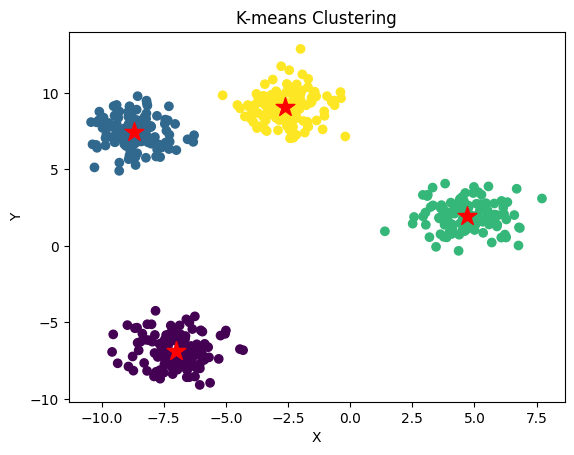

In [71]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
n_samples = 500
n_clusters = 4
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200)
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

ADD THE CLUSTER DATA WITH THE RIMARY DATA SET

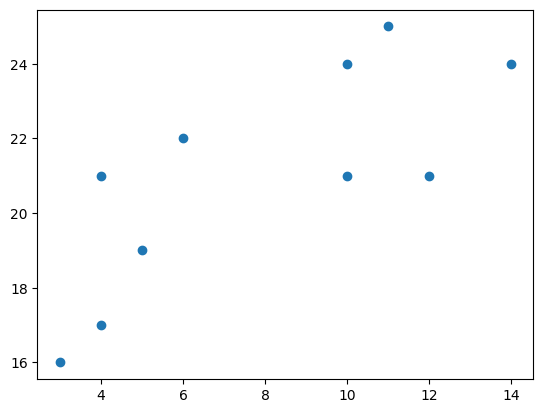

In [72]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

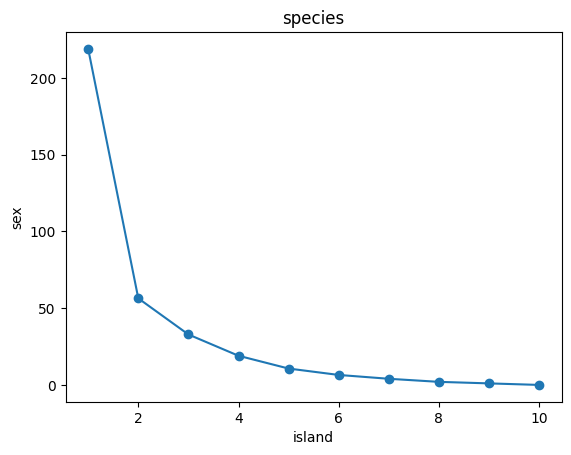

In [73]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('species')
plt.xlabel('island')
plt.ylabel('sex')
plt.show()

SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [74]:
x=df.iloc[:,1:].values

In [75]:
x

array([[2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 2.00e+00],
       [2.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [2.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [0.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 2.00e+00],
       [0.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [0.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 2.00e+00]])

In [76]:
y=df.iloc[:,1].values.reshape(-1,1)
     

In [77]:
y[:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

SPLIT THE DATA INTO TRAINING AND TESTING

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
x_train

array([[1.000e+00, 4.650e+01, 1.790e+01, 1.920e+02, 3.500e+03, 1.000e+00],
       [0.000e+00, 3.970e+01, 1.770e+01, 1.930e+02, 3.200e+03, 1.000e+00],
       [2.000e+00, 4.020e+01, 1.700e+01, 1.760e+02, 3.450e+03, 1.000e+00],
       ...,
       [2.000e+00, 4.140e+01, 1.850e+01, 2.020e+02, 3.875e+03, 2.000e+00],
       [0.000e+00, 4.200e+01, 1.950e+01, 2.000e+02, 4.050e+03, 2.000e+00],
       [1.000e+00, 5.050e+01, 1.840e+01, 2.000e+02, 3.400e+03, 1.000e+00]])

In [82]:
x.shape

(334, 6)

In [83]:
y.shape

(334, 1)

In [84]:
x_train.shape

(267, 6)

In [85]:
x_test.shape

(67, 6)

In [86]:
y_train.shape

(267, 1)

In [87]:
y_test.shape

(67, 1)

In [88]:
x

array([[2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 2.00e+00],
       [2.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [2.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [0.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 2.00e+00],
       [0.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [0.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 2.00e+00]])

In [89]:
y

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
    

BUILD MODEL

In [90]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=4)

In [91]:
xp=pr.fit_transform(x,y)

In [92]:
x[0]

array([2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 2.00e+00])

TRAIN THE MODEL

In [93]:
xp

array([[1.00000e+00, 2.00000e+00, 3.91000e+01, ..., 5.62500e+07,
        3.00000e+04, 1.60000e+01],
       [1.00000e+00, 2.00000e+00, 3.95000e+01, ..., 1.44400e+07,
        3.80000e+03, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.03000e+01, ..., 1.05625e+07,
        3.25000e+03, 1.00000e+00],
       ...,
       [1.00000e+00, 0.00000e+00, 5.04000e+01, ..., 1.32250e+08,
        4.60000e+04, 1.60000e+01],
       [1.00000e+00, 0.00000e+00, 4.52000e+01, ..., 2.70400e+07,
        5.20000e+03, 1.00000e+00],
       [1.00000e+00, 0.00000e+00, 4.99000e+01, ..., 1.16640e+08,
        4.32000e+04, 1.60000e+01]])

TEST THE MODEL

In [94]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [95]:
y1=y_train
y=x_train

In [96]:
mlr.fit(y,y1)

LinearRegression()

In [97]:
ypred=mlr.predict(x_test)
     

In [98]:
ypred

array([[ 1.00000000e+00],
       [ 1.00000000e+00],
       [-1.36076797e-14],
       [ 1.45329836e-14],
       [ 1.00000000e+00],
       [ 1.53050665e-14],
       [ 1.00000000e+00],
       [-1.18527360e-14],
       [ 2.00000000e+00],
       [ 1.92602082e-14],
       [ 6.66761199e-15],
       [ 1.30276740e-15],
       [ 1.00000000e+00],
       [-2.01835156e-14],
       [ 2.00000000e+00],
       [-1.56249432e-14],
       [ 2.00000000e+00],
       [ 7.41470065e-15],
       [ 1.00000000e+00],
       [-8.41546236e-15],
       [ 2.00000000e+00],
       [ 1.00000000e+00],
       [ 7.94709091e-15],
       [ 1.62521028e-14],
       [ 2.49810010e-14],
       [ 5.00702674e-15],
       [ 1.93520824e-14],
       [ 2.29362045e-14],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [-5.52459953e-15],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.92231226e-14],
       [ 2.00000000e+00],
       [-4.83358821e-15],
       [ 2.00000000e+00],
       [ 3.1

In [99]:
y_test

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
       [0],
       [2],
       [1],
       [0]])

MEASURE THE PERFORMANCE USING METRICS

In [100]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,ypred)
acc
     

1.0